# How to Visualize Your Results?
Guorui Shen, guorui233@outlook.com

Jul 2, 2019

## 1 - Visualize Curves

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # projection='3d'
import scipy.io as sio

In [2]:
lrz = sio.loadmat('Lorenz.mat')
data, t = lrz['states'], lrz['t'][0]
print(data.shape, t.shape)

((6000, 3), (6000,))


Text(0.5,0,u't')

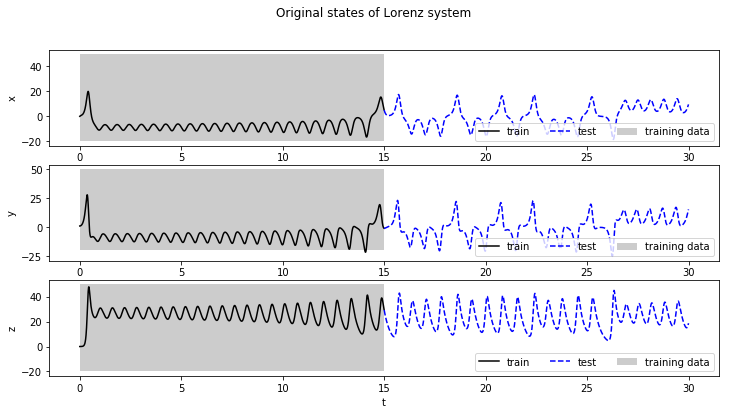

In [3]:
ylabels = ['x', 'y', 'z']
figure, axises = plt.subplots(nrows=3, ncols=1, figsize=(12, 6))

# fig.title('Original states of Lorenz system')
figure.suptitle('Original states of Lorenz system')
for i, (ylabel,axis) in enumerate(zip(ylabels, axises)):
#     axis.set_title(ylabel+' vs t')
    axis.plot(t[:3000], data[:3000, i], 'k-', t[3000:], data[3000:, i], 'b--')
    axis.fill([t[0], t[0], t[2999], t[2999]], [-20, 50, 50, -20], fc='black', alpha=0.2, label='training data')
    axis.set_ylabel(ylabel)
    axis.legend(["train", "test", "training data"], loc='lower right', ncol=3)
axis.set_xlabel('t')

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


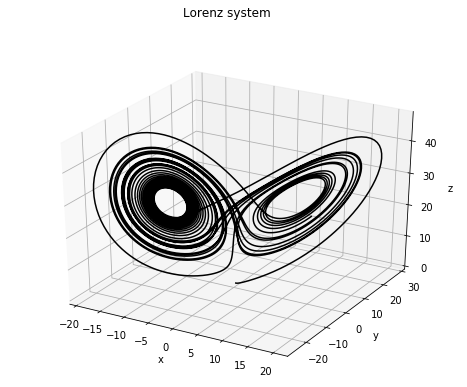

In [4]:
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Lorenz system')
ax = fig.gca(projection='3d')
ax.plot(data[:,0], data[:,1], data[:,2], 'k-', label='Lorenz')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.show()

## 2 - Visualize Surface

In [5]:
from matplotlib import cm # 3D surface color
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # projection='3d'
import scipy.io as sio
import numpy as np

In [6]:
ks = sio.loadmat('KS.mat')
data, x, t = ks['uu'], ks['x'][:, 0], ks['tt'][0]
print(data.shape, x.shape, t.shape)

((801, 128), (128,), (801,))


(801, 128)


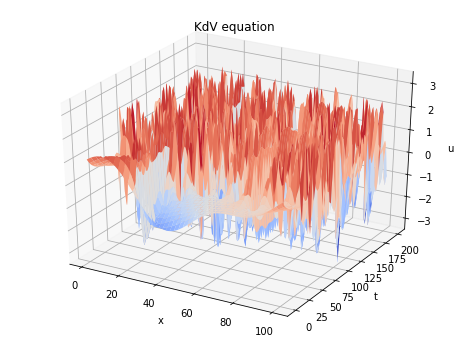

In [7]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca(projection='3d')
X, T = np.meshgrid(x, t)
print(X.shape)
ax.plot_surface(X, T, data, cmap=cm.coolwarm) # cmap = 'viridis'
ax.set_title('KdV equation')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
fig.show()

(3.367221947525568, 2.437782367637661)


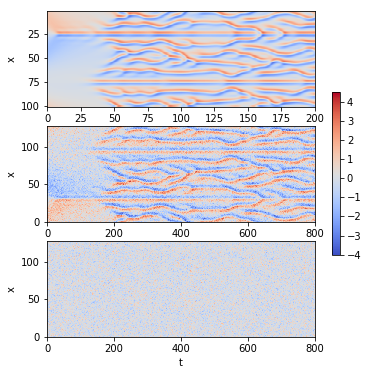

In [8]:
data_error = np.random.normal(0, 1, data.shape)/2.0
print(data.max(), data_error.max())
data_predict = data_error + data

min_val = min(data.min(), data_predict.min(), data_error.min())
max_val = max(data.max(), data_predict.max(), data_error.max())
T, X = np.meshgrid(t, x)

fig, (ax_1, ax_2, ax_error) = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
ax_1.set_ylabel('x')
ax_2.set_ylabel('x')
ax_error.set_ylabel('x')
ax_error.set_xlabel('t')

ax_1.axis([t[0], t[-1], x[-1], x[0]])

mesh_1 = ax_1.pcolormesh(T, X, data.T, vmin=min_val, vmax=max_val, cmap = cm.coolwarm)
mesh_2 = ax_2.pcolormesh(data_predict.T, vmin=min_val, vmax=max_val, cmap = cm.coolwarm)
mesh_error = ax_error.pcolormesh(data_error.T, vmin=min_val, vmax=max_val, cmap = cm.coolwarm)

fig.colorbar(mesh_2, ax=[ax_1, ax_2, ax_error], shrink=0.5)
fig.show()